# Part 4 Curve Fitting

## Chapter 14 Linear Regression

## Chapter 15 Linear Least Square and Nonlinear Regression

- Polynomial Regression
- Multiple linear regression
- General linear least square regression
- Nonlinear Regression

## Chapter 16 Fourier Analysis

- Fourier Series
- FFT


# Chapter 14 Linear Regression

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

## statistics review

normal (or Gaussian or Gauss or Laplace–Gauss) distribution

$$ {\displaystyle f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}} $$

- $\mu$  is the mean or expectation of the distribution (and also its median and mode)
- $\sigma$  is its standard deviation
- variance of the distribution is $ \sigma ^{2}$

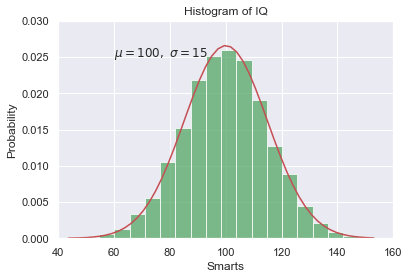

In [7]:
# np.random.seed(112)
mu, sigma = 100, 15
x = mu + sigma*np.random.randn(5000) 
n, bins, patches = plt.hist(x, 20, density=True, facecolor='g', alpha=0.75)

xx = np.linspace(np.min(x), np.max(x))
pp = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(xx - mu)**2/(2*sigma**2))
plt.plot(xx, pp, 'r')

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100, \ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

In [5]:
# descriptive statistics
print(x.size)
print( x.mean(), np.mean(x) )
print( x.std() )
print( x.var() )
print( x.sum() )
print( x.min() )
print( x.max() )

5000
99.70472794989148 99.70472794989148
14.96618387954928
223.98665991648073
498523.6397494574
45.34683371197708
157.0549704961931


In [23]:
n = 10000
p = 0
for k in range(n):
    if np.random.random() > 0.5:
        p += 1

print(p/n)

0.5077


## Problem 14.39
난수를 사용하여 함수의 최대값 구하기

$$ f(x, y) = y - x - 2 x^2 - 2*x*y - y^2 $$

$$ -2 < x < 2, \quad 1 < y < 3 $$

In [29]:
def rand_opt(fun, r, kmax=10000):
    r = np.asfarray(r)
    r1, r2 = r[:, 0], r[:, 1]
    dr = r2 - r1
    n = len(r2)
    xopt, fmin = r1, fun(r1)
    for k in range(kmax):
        x = r1 + dr*np.random.rand(n)
        f = fun(x)
        if f < fmin:
            print(k, np.round(f, 4), np.round(x, 4))
            fmin = f
            xopt = x.copy()
    return fmin, xopt


def fun(xx):
    x, y = xx
    f = y - x - 2*x**2 - 2*x*y - y**2
    return -f


f, x = rand_opt(fun, [[-2, 2], [1, 3]])
print(np.round(f, 4), np.round(x, 4))


0 0.8793 [-0.0523  1.6619]
3 0.218 [-0.4303  1.9996]
11 -0.3467 [-1.6353  1.4283]
14 -0.375 [-0.768   2.1742]
19 -0.5523 [-1.7716  2.5915]
28 -0.6968 [-0.4046  1.3503]
42 -1.0734 [-1.048   1.1305]
48 -1.0885 [-0.9723  1.0713]
66 -1.1002 [-1.356  2.008]
91 -1.1848 [-1.2552  1.7637]
224 -1.2366 [-0.8987  1.4546]
530 -1.2478 [-1.0234  1.4827]
685 -1.249 [-1.0138  1.542 ]
2194 -1.2496 [-1.0183  1.5253]
-1.2496 [-1.0183  1.5253]


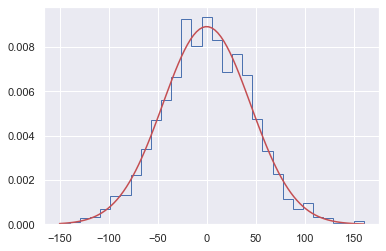

In [5]:
"""Random walk"""
m = 2000  # 스텝 수
n = 2000  # 입자 수
x = np.zeros(n)

for k in range(m):
    x += -1 + 2*np.random.randint(2, size=n)
    
plt.hist(x, 30, histtype='step', density=True)

mu = x.mean()
sigma = x.std()
xx = np.linspace(x.min(), x.max(), 101)
pp = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(xx - mu)**2/(2*sigma**2))
plt.plot(xx, pp, 'r')
plt.show()

## 14.3 Linear least-square regression

A simple data set consists of n points (data pairs) $(x_{i},y_{i})\!, i = 1, ..., n$, where $x_{i}$ is an independent variable and $ y_{i}$ is a dependent variable whose value is found by observation. The model function has the form $f(x,\beta )$, where $m$ adjustable parameters are held in the vector $\boldsymbol {\beta }$. The goal is to find the parameter values for the model that "best" fits the data. The fit of a model to a data point is measured by its residual, defined as the difference between the actual value of the dependent variable and the value predicted by the model:
$$ r_{i}=y_{i}-f(x_{i},{\boldsymbol  \beta })$$.

The residuals are plotted against corresponding $x$ values. The random fluctuations about $\displaystyle r_{i}=0$ indicate a linear model is appropriate. The least-squares method finds the optimal parameter values by minimizing the sum, $S$, of squared residuals:

$$ S=\sum_{i=1}^{n} r_{i}^{2}$$

Linear least square
$$ f(x, a) = a_0 x + a_1 $$

$$ S = \sum_{i=1}^{n} r_i^2 = \sum_{i=1}^{n} (y_i - a_0 x_i - a_1)^2$$

a standard approach in regression analysis to approximate the solution of **overdetermined systems** (sets of equations in which there are more equations than unknowns) by minimizing the sum of the squares of the residuals made in the results of every single equation.

$$\frac{\partial S}{\partial a_0} = 0, \quad \frac{\partial S}{\partial a_1} = 0$$

$$ a_0 = \frac{n \sum x_i y_i - \sum x_i \sum y_i}{n \sum x_i^2 - (\sum x_i)^2} $$

$$a_1 = \frac{\sum x_i^2 \sum y_i - \sum x_i \sum y_i}{n \sum x_i^2 - (\sum x_i)^2} = \bar{y} - a_0 \bar{x}$$

$$\bar{x} = \frac{1}{n} \sum x_i, \quad \bar{y} = \frac{1}{n} \sum y_i$$


### Example 14.4

19.470238095238095 -234.28571428571422


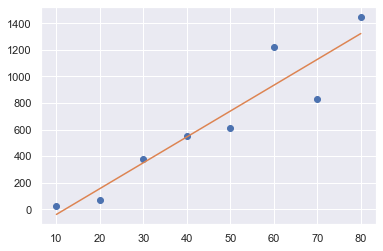

In [31]:
xdata = np.arange(10, 81, 10)
ydata = np.array([25, 70, 380, 550, 610, 1220, 830, 1450])
n = len(xdata)
sx, sy, sxy, sx2 = xdata.sum(), ydata.sum(), (xdata*ydata).sum(), (xdata**2).sum()
a0 = (n*sxy - sx*sy)/(n*sx2 - sx**2)
a1 = ydata.mean() - a0*xdata.mean()
print(a0, a1)
plt.plot(xdata, ydata, 'o')
y = a0*xdata + a1
plt.plot(xdata, y);

## Moore–Penrose inverse $ A^+ = (A^T A)^{-1} A^T$

$$ X a = y $$

$$ \begin{bmatrix} x_1 & 1 \\
x_2 & 1 \\
\cdots & \cdots  \\
x_n & 1
\end{bmatrix} 
\begin{bmatrix} a_0 \\
a_1 
\end{bmatrix} 
= 
\begin{bmatrix} y_1 \\
y_2 \\
\cdots \\
y_n
\end{bmatrix} 
$$

$$a = (X^T X)^{-1} X^T y$$

In [32]:
X = np.c_[xdata, np.ones(len(xdata))]
a = np.linalg.pinv(X) @ y
print(a)

[  19.4702381  -234.28571429]


In [33]:
def least_square_fit1(xdata, ydata, graph=False): 
    xdata = np.asfarray(xdata)
    ydata = np.asfarray(ydata)
    n = len(xdata)
    sx, sy, sxy, sx2 = np.sum(xdata), np.sum(ydata), np.sum(xdata*ydata), np.sum(xdata**2)
    xbar, ybar = np.mean(xdata), np.mean(ydata)
    a0 = (n*sxy - sx*sy)/(n*sx2 - sx**2)
    a1 = ybar - a0*xbar
    St = np.sum((ydata - ybar)**2)
    Sr = np.sum((ydata - a0*xdata - a1)**2)
    r2 = (St - Sr)/St # coefficient of determination
    if graph:
        plt.plot(xdata, ydata, 'o')
        y = a0*xdata + a1
        plt.plot(xdata,y)
    return np.array([a0, a1]), r2

def least_square_fit1(xdata, ydata, graph=False): 
    X = np_c[xdata, np.ones_like(x)]
    a = np.linalg.pinv(X)
    St = np.sum((ydata - np.mean(ydata))**2)
    St = np.sum((X @ a - ydata)**2)
    r2 = (St - Sr)/St # coefficient of determination
    if graph:
        plt.plot(xdata, ydata, 'o')    
        y = X @ a
        plt.plot(xdata,y)
    return np.array([a0, a1]), r2
    

[  19.4702381  -234.28571429] 0.8804852467812262
[  19.4702381  -234.28571429]


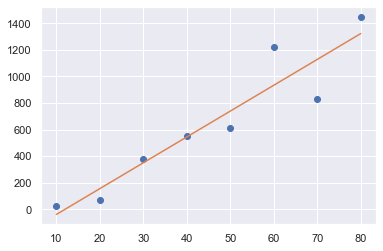

In [55]:
a, r2 = least_square_fit(xdata, ydata, graph=True)
print(a, r2)

a = np.polyfit(xdata, ydata, 1)
print(a)

## 14.4 Linearization of Nonlinear Relationships
- linear regression
$$y = a_0 + a_1 x$$
- exponential model
$$ y = \alpha e^{\beta x} \qquad \log y = \log \alpha + \beta x $$
- power model
$$ y = \alpha x^\beta \qquad \log y = \log \alpha + \beta \log x$$
- saturation growth model
$$ y = \frac{\alpha x }{\beta + x} \qquad \frac{1}{y} = \frac{1}{\alpha} + \frac{\beta}{\alpha} \frac{1}{x}$$ 


### Example 14.6

$$ y = \alpha x^{\beta}$$
$$\log y = \log \alpha + \beta \log x$$

[2.53840013 1.43585307]


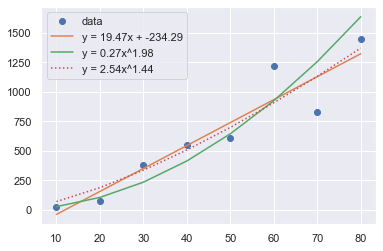

In [60]:
xdata = np.arange(10, 81, 10)
ydata = np.array([25, 70, 380, 550, 610, 1220, 830, 1450])
plt.plot(xdata, ydata, 'o', label='data')
# linear regression
a = np.polyfit(xdata, ydata, 1)
plt.plot(xdata, np.polyval(a, xdata), label='y = {:.2f}x + {:.2f}'.format(a[0], a[1]))

# power law and linearization
a = np.polyfit(np.log(xdata), np.log(ydata), 1)
alpha = np.exp(a[1])
beta = a[0]
y = alpha*xdata**beta
plt.plot(xdata, y, label='y = {:.2f}x^{:.2f}'.format(alpha, beta))

# nonlinear regression
from scipy.optimize import least_squares

def fun(a, x, y):
    return a[0]*x**a[1] - y

res = least_squares(fun, [1, 1], args=(xdata, ydata))
a = res.x
print(a)
y = a[0]*xdata**a[1]
plt.plot(xdata, y, ':',  label='y = {:.2f}x^{:.2f}'.format(a[0], a[1]))

plt.legend()
plt.show()

### Case Study 14.6 효소반응론

Model-1 
$$ v = \frac{v_m S} {k_s + S}, \quad \frac{1}{v} = \frac{1}{v_m} + \frac{k_s}{v_m} \frac{1}{S}$$

Model-2
$$ v = \frac{v_m S^2} {k_s^2 + S^2} , \quad \frac{1}{v} = \frac{1}{v_m} + \frac{k_s^2}{v_m} \frac{1}{S^2} $$

In [42]:
S = np.array([1.3, 1.8, 3., 4.5, 6, 8, 9])
v = np.array([0.07, 0.13, 0.22, 0.275, 0.335, 0.35, 0.36])

[16.40223635  0.19022388] 0.9344054592310692
[19.37599713  2.4492275 ] 0.9929343669815539


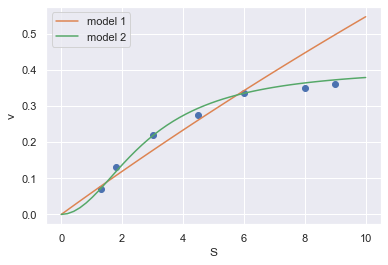

In [49]:
plt.plot(S, v, 'o')

# model 1
a, r2 = least_square_fit(1/S, 1/v)
print(a, r2)
vm = 1/a[1]
ks = vm*a[0]
x = np.linspace(0, 10)
plt.plot(x, vm*x/(ks + x), label='model 1')

# model 2
a, r2 = least_square_fit(1/S**2, 1/v)
print(a, r2)
vm = 1/a[1]
ks = np.sqrt(a[0]*vm)
plt.plot(x, vm*x**2/(ks**2 + x**2), label='model 2')

plt.legend()
plt.xlabel('S')
plt.ylabel('v')
plt.show()